In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [5]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip()

In [7]:
for col in ['pcv', 'wc', 'rc']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
replace_map = {
    'yes': 1, 'no': 0,
    'present': 1, 'notpresent': 0,
    'good': 1, 'poor': 0,
    'abnormal': 1, 'normal': 0
}

In [9]:
for col in ['htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'rbc', 'pc', 'pcc', 'ba']:
    df[col] = df[col].replace(replace_map)

In [10]:
df['classification'] = df['classification'].replace({'ckd\t': 'ckd'})
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})

In [11]:
print("Dtype cleaning done")
print(df.dtypes)

Dtype cleaning done
id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification      int64
dtype: object


In [12]:
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

for col in cat_cols:
    df[col] = df[col].astype(float).astype('Int64') 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    Int64  
 7   pc              335 non-null    Int64  
 8   pcc             396 non-null    Int64  
 9   ba              396 non-null    Int64  
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [14]:
df = df.drop(columns=['id'])
print("id' column dropped")
print(df.shape)

id' column dropped
(400, 25)


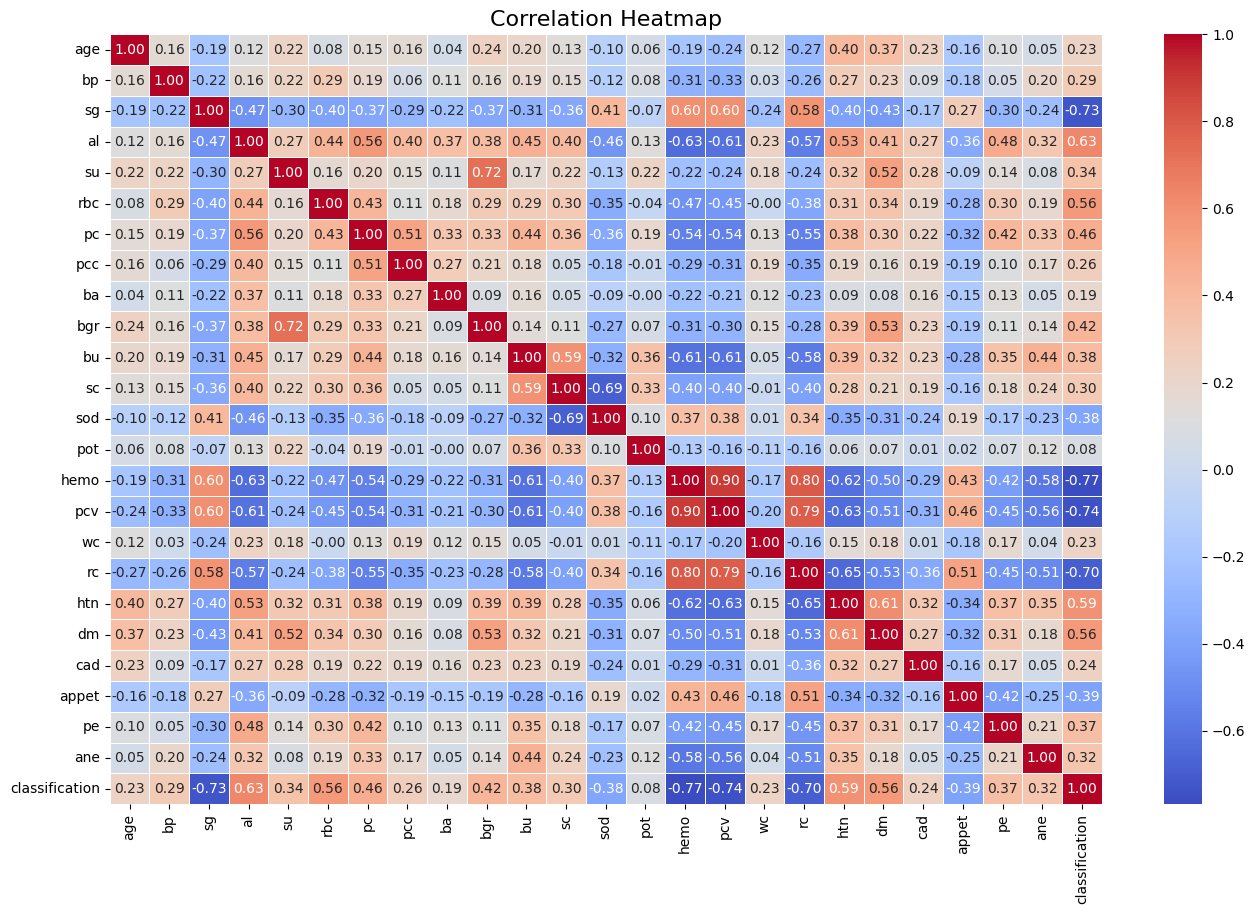

In [15]:
# Sirf numeric columns lo correlation ke liye
numeric_df = df.select_dtypes(include=['float64', 'int64', 'Int64'])

plt.figure(figsize=(16,10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [16]:
corr_matrix = df.corr().abs()

# upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# features to drop
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

# make sure classification (target) is not dropped
if "classification" in to_drop:
    to_drop.remove("classification")

print("Highly correlated features to drop:", to_drop)

df_reduced = df.drop(columns=to_drop)

print("Reduced dataset shape:", df_reduced.shape)


Highly correlated features to drop: ['bgr', 'pcv', 'rc']
Reduced dataset shape: (400, 22)


In [17]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    Int64  
 6   pc              335 non-null    Int64  
 7   pcc             396 non-null    Int64  
 8   ba              396 non-null    Int64  
 9   bu              381 non-null    float64
 10  sc              383 non-null    float64
 11  sod             313 non-null    float64
 12  pot             312 non-null    float64
 13  hemo            348 non-null    float64
 14  wc              294 non-null    float64
 15  htn             398 non-null    Int64  
 16  dm              398 non-null    Int64  
 17  cad             398 non-null    Int

In [18]:
num_cols = df_reduced.select_dtypes(include=['float64', 'int64']).columns
skewness = df_reduced[num_cols].skew()

print("Skewness:\n", skewness)


Skewness:
 age               -0.668259
bp                 1.605429
sg                -0.172444
al                 0.998157
su                 2.464262
rbc                 1.59409
pc                 1.310225
pcc                2.568492
ba                 3.895341
bu                 2.634374
sc                 7.509538
sod               -6.996569
pot               11.582956
hemo              -0.335095
wc                 1.621589
htn                0.543475
dm                 0.658238
cad                2.977593
appet             -1.463082
pe                 1.582437
ane                 1.96366
classification    -0.518344
dtype: Float64


In [19]:
right_skewed = skewness[skewness > 0.5]

In [20]:
left_skewed = skewness[skewness < -0.5]

print("Right Skewed Columns:\n", right_skewed)
print("\n Left Skewed Columns:\n", left_skewed)

Right Skewed Columns:
 bp      1.605429
al      0.998157
su      2.464262
rbc      1.59409
pc      1.310225
pcc     2.568492
ba      3.895341
bu      2.634374
sc      7.509538
pot    11.582956
wc      1.621589
htn     0.543475
dm      0.658238
cad     2.977593
pe      1.582437
ane      1.96366
dtype: Float64

 Left Skewed Columns:
 age              -0.668259
sod              -6.996569
appet            -1.463082
classification   -0.518344
dtype: Float64


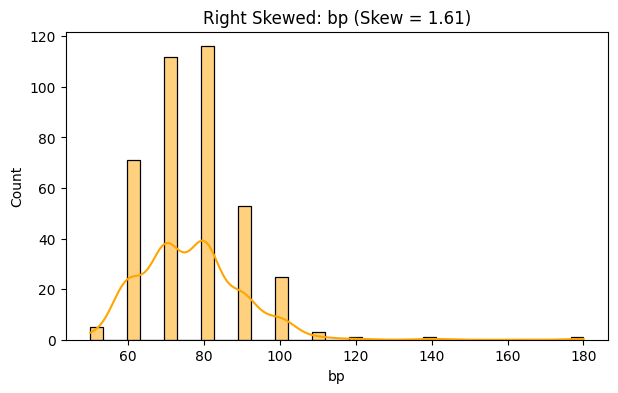

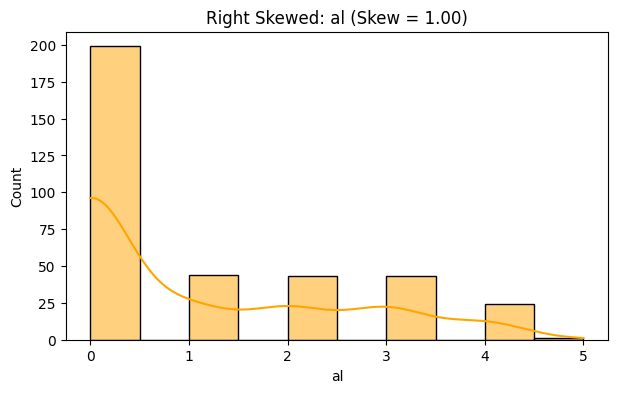

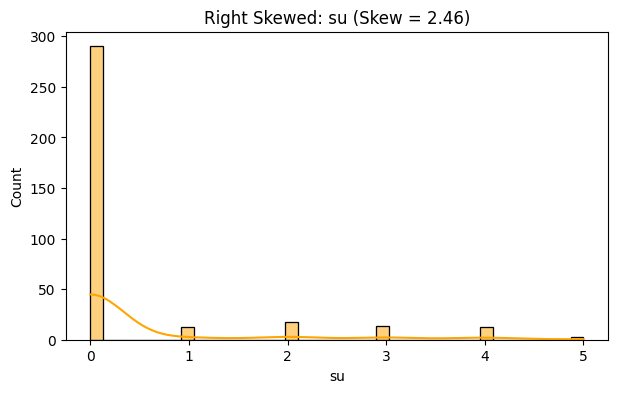

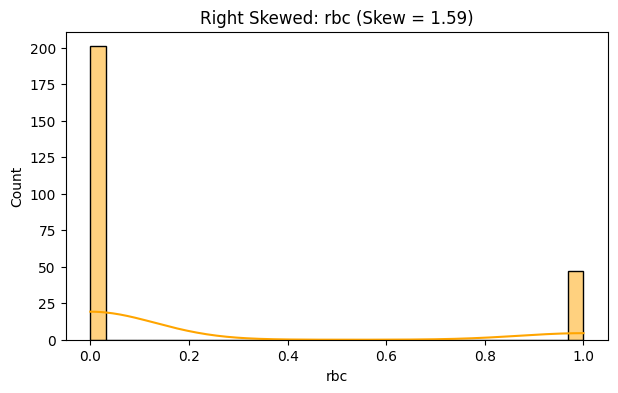

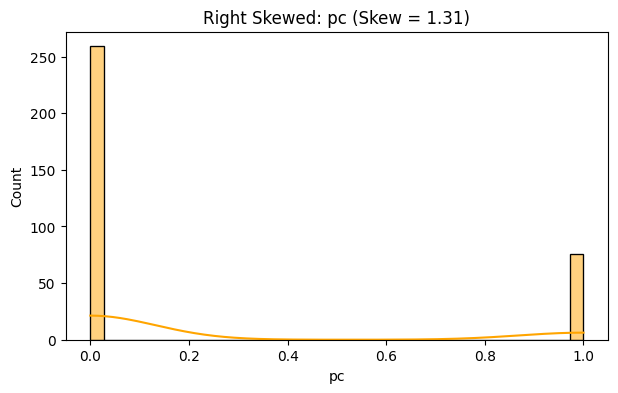

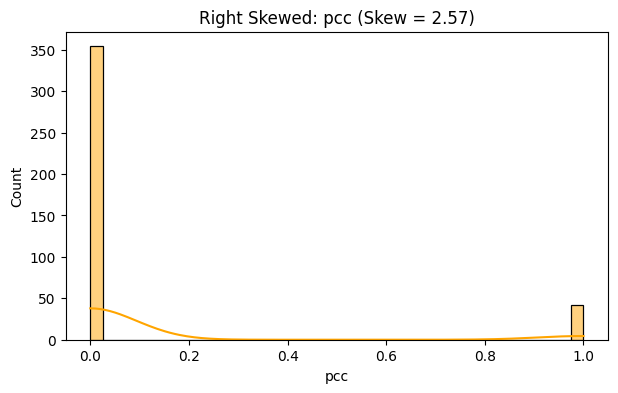

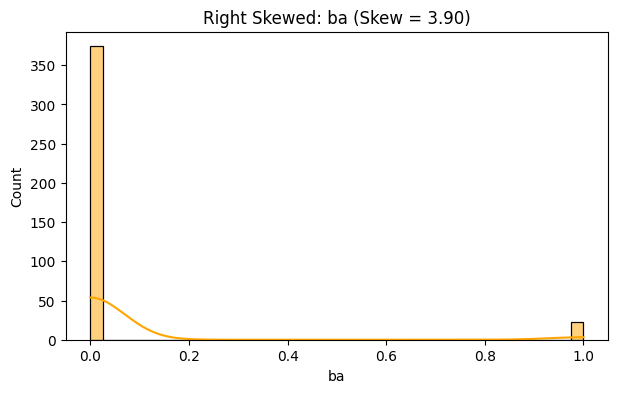

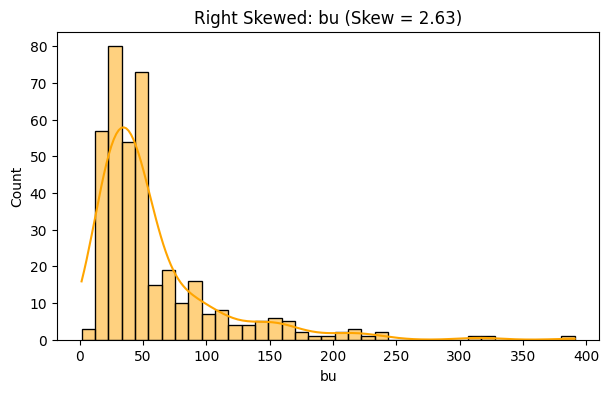

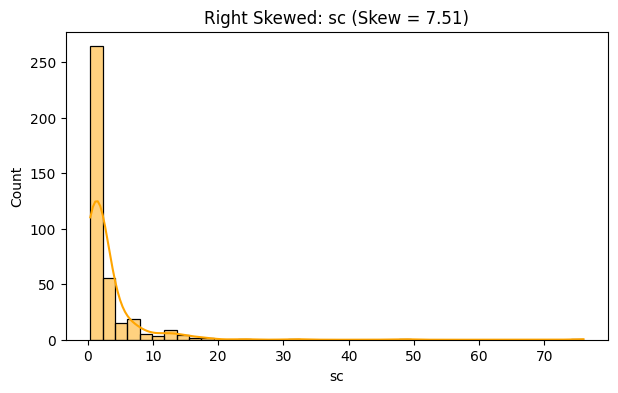

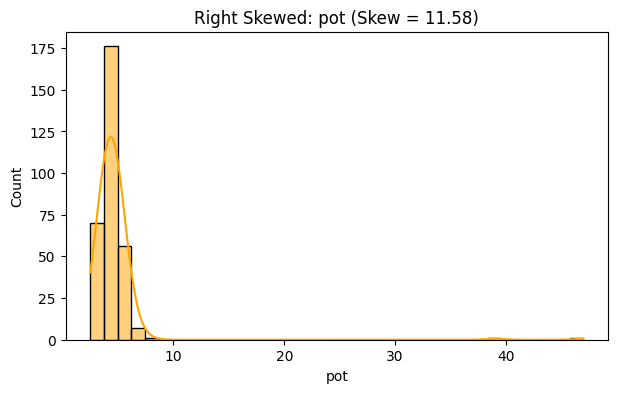

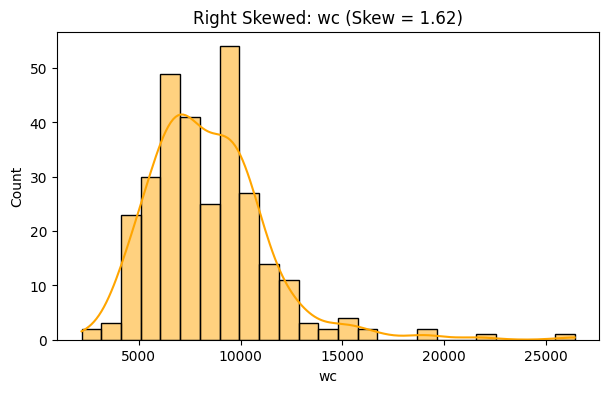

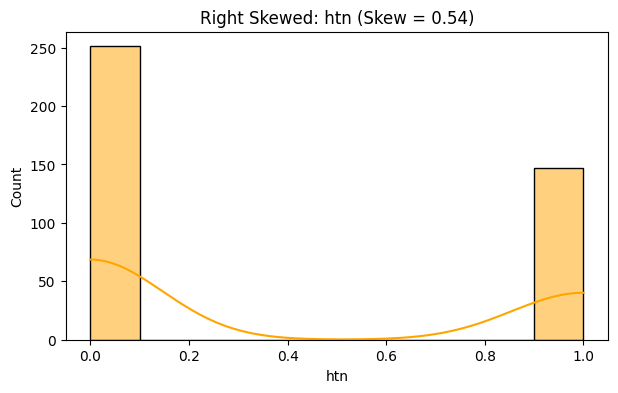

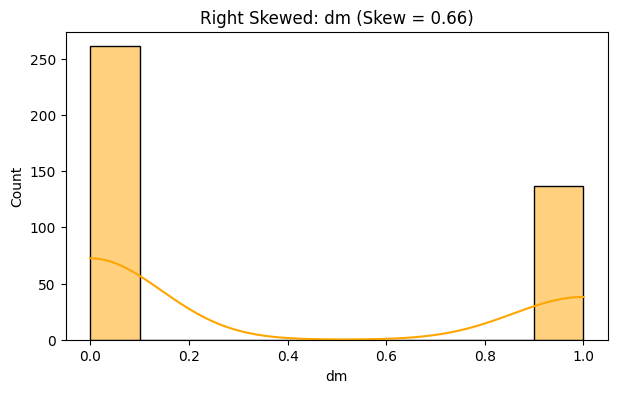

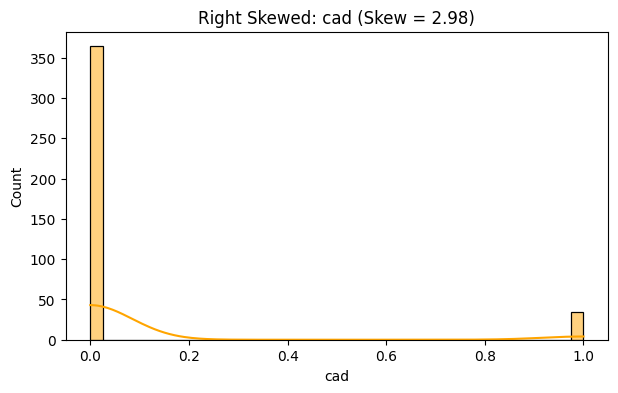

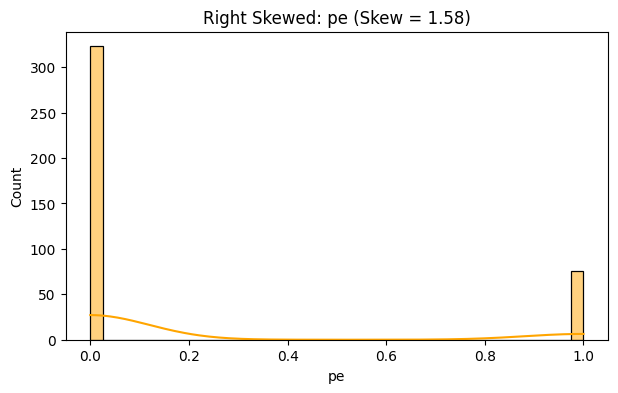

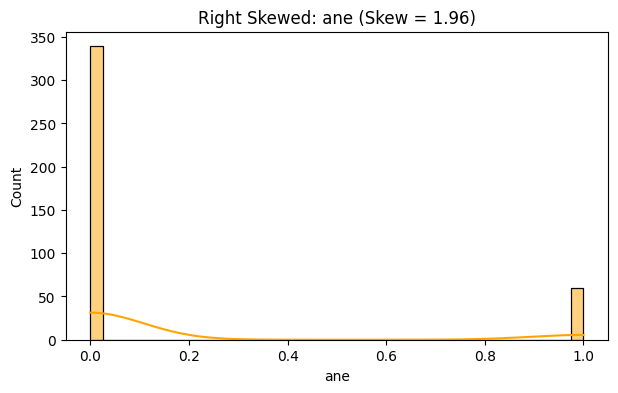

In [21]:
for col in right_skewed.index:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, color="orange")
    plt.title(f"Right Skewed: {col} (Skew = {skewness[col]:.2f})")
    plt.show()

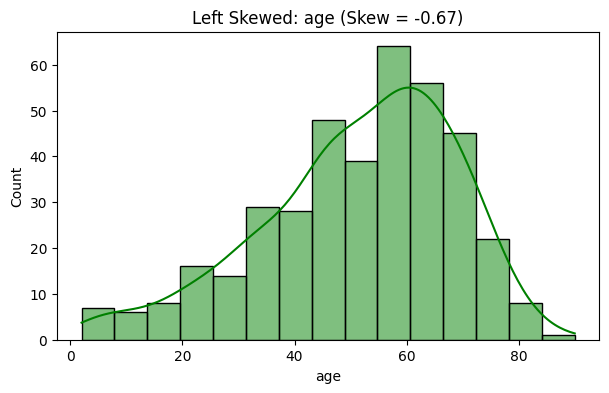

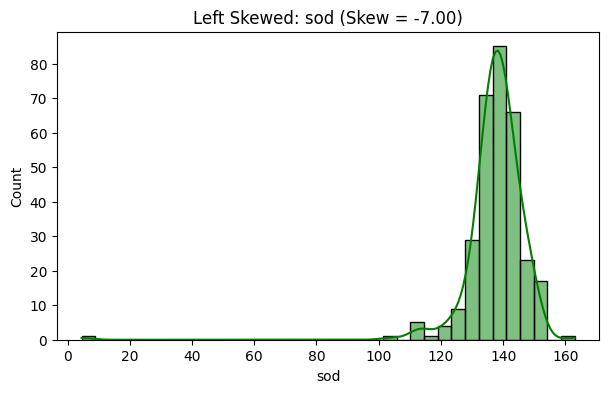

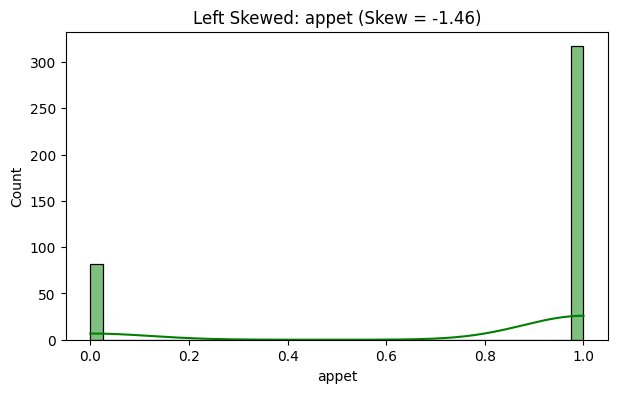

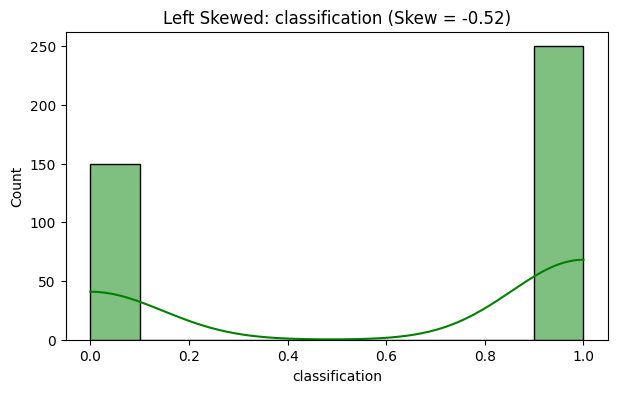

In [22]:
for col in left_skewed.index:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, color="green")
    plt.title(f"Left Skewed: {col} (Skew = {skewness[col]:.2f})")
    plt.show()

In [23]:
# Separate numeric columns from reduced dataset
float_cols = df_reduced.select_dtypes(include=['float64']).columns   # continuous
int_cols   = df_reduced.select_dtypes(include=['Int64', 'int64']).columns  # categorical encoded

# Skewness for continuous float cols
skewness = df_reduced[float_cols].skew()

# Imputation for continuous numeric features
for col in float_cols:
    if df_reduced[col].isnull().sum() > 0:
        if skewness[col] < -0.5:   # left skewed
            df_reduced[col] = df_reduced[col].fillna(df_reduced[col].median())
            print(f"{col} → Imputed with Median (Left Skewed)")
        elif skewness[col] > 0.5:  # right skewed
            df_reduced[col] = df_reduced[col].fillna(df_reduced[col].mean())
            print(f"{col} → Imputed with Mean (Right Skewed)")
        else:  # near normal
            df_reduced[col] = df_reduced[col].fillna(df_reduced[col].mean())
            print(f"{col} → Imputed with Mean (Normal-ish)")

# Imputation for categorical int features
for col in int_cols:
    if df_reduced[col].isnull().sum() > 0:
        df_reduced[col] = df_reduced[col].fillna(df_reduced[col].mode()[0])
        print(f"{col} → Imputed with Mode (Categorical)")

print("\n✅ All missing values handled in reduced dataset")
print(df_reduced.isnull().sum().sum(), "missing values left")


age → Imputed with Median (Left Skewed)
bp → Imputed with Mean (Right Skewed)
sg → Imputed with Mean (Normal-ish)
al → Imputed with Mean (Right Skewed)
su → Imputed with Mean (Right Skewed)
bu → Imputed with Mean (Right Skewed)
sc → Imputed with Mean (Right Skewed)
sod → Imputed with Median (Left Skewed)
pot → Imputed with Mean (Right Skewed)
hemo → Imputed with Mean (Normal-ish)
wc → Imputed with Mean (Right Skewed)
rbc → Imputed with Mode (Categorical)
pc → Imputed with Mode (Categorical)
pcc → Imputed with Mode (Categorical)
ba → Imputed with Mode (Categorical)
htn → Imputed with Mode (Categorical)
dm → Imputed with Mode (Categorical)
cad → Imputed with Mode (Categorical)
appet → Imputed with Mode (Categorical)
pe → Imputed with Mode (Categorical)
ane → Imputed with Mode (Categorical)

✅ All missing values handled in reduced dataset
0 missing values left


In [24]:
cat_cols = df_reduced.select_dtypes(include=['Int64', 'int64']).columns

for col in cat_cols:
    if df_reduced[col].isnull().sum() > 0:
        df_reduced[col] = df_reduced[col].fillna(df_reduced[col].mode()[0])
        print(f"{col} → Imputed with Mode (Categorical)")

print("All missing values handled in reduced dataset")
print(df_reduced.isnull().sum().sum(), "missing values left")


All missing values handled in reduced dataset
0 missing values left


In [25]:
df_reduced.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bu,...,pot,hemo,wc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.0,400.0,400.0,400.000000,...,400.000000,400.000000,400.000000,400.0,400.0,400.0,400.0,400.0,400.0,400.000000
mean,51.562500,76.469072,1.017408,1.016949,0.450142,0.1175,0.19,0.105,0.055,57.425722,...,4.627244,12.526437,8406.122449,0.3675,0.3425,0.085,0.795,0.19,0.15,0.625000
std,16.982996,13.476298,0.005369,1.272318,1.029487,0.322418,0.392792,0.306937,0.228266,49.285887,...,2.819783,2.716171,2523.219976,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.500000,...,2.500000,3.100000,2200.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.0,0.0,0.0,0.0,27.000000,...,4.000000,10.875000,6975.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
50%,55.000000,78.234536,1.017408,1.000000,0.000000,0.0,0.0,0.0,0.0,44.000000,...,4.627244,12.526437,8406.122449,0.0,0.0,0.0,1.0,0.0,0.0,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450142,0.0,0.0,0.0,0.0,61.750000,...,4.800000,14.625000,9400.000000,1.0,1.0,0.0,1.0,0.0,0.0,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.0,1.0,1.0,1.0,391.000000,...,47.000000,17.800000,26400.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000


In [26]:
X = df_reduced.drop(columns=['classification'])   # features
y = df_reduced['classification']                  # target

print("X (independent) shape:", X.shape)
print("y (dependent) shape:", y.shape)

X (independent) shape: (400, 21)
y (dependent) shape: (400,)


In [27]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bu,...,sod,pot,hemo,wc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,36.0,...,138.0,4.627244,15.4,7800.0,1,1,0,1,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,18.0,...,138.0,4.627244,11.3,6000.0,0,0,0,1,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,53.0,...,138.0,4.627244,9.6,7500.0,0,1,0,0,0,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,56.0,...,111.0,2.500000,11.2,6700.0,1,0,0,0,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,26.0,...,138.0,4.627244,11.6,7300.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,49.0,...,150.0,4.900000,15.7,6700.0,0,0,0,1,0,0
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,31.0,...,141.0,3.500000,16.5,7800.0,0,0,0,1,0,0
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,26.0,...,137.0,4.400000,15.8,6600.0,0,0,0,1,0,0
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,50.0,...,135.0,4.900000,14.2,7200.0,0,0,0,1,0,0


In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

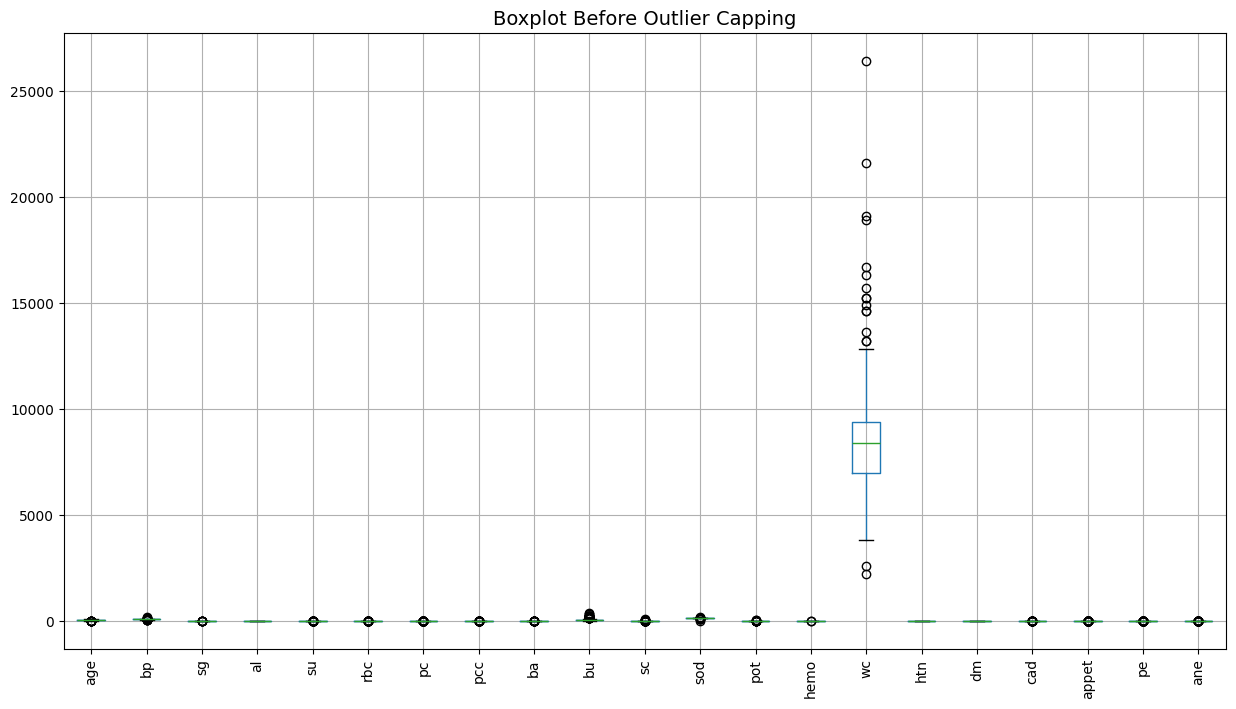

In [ ]:
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15,8))
X[num_cols].boxplot(rot=90)   # ✅ X use karo, df nahi
plt.title("Boxplot Before Outlier Capping", fontsize=14)
plt.show()


In [30]:
df_capped = df_reduced.copy()   # ✅ reduced dataset pe apply karo
for col in num_cols:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # factor = 2.0 (kam outliers cap honge, tum 2.5 bhi try kar sakte ho)
    lower = Q1 - 2.0 * IQR
    upper = Q3 + 2.0 * IQR
    
    df_capped[col] = np.where(df_capped[col] < lower, lower, df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper, upper, df_capped[col])

print("Outliers capped with factor=2.0 (less strict)")

Outliers capped with factor=2.0 (less strict)


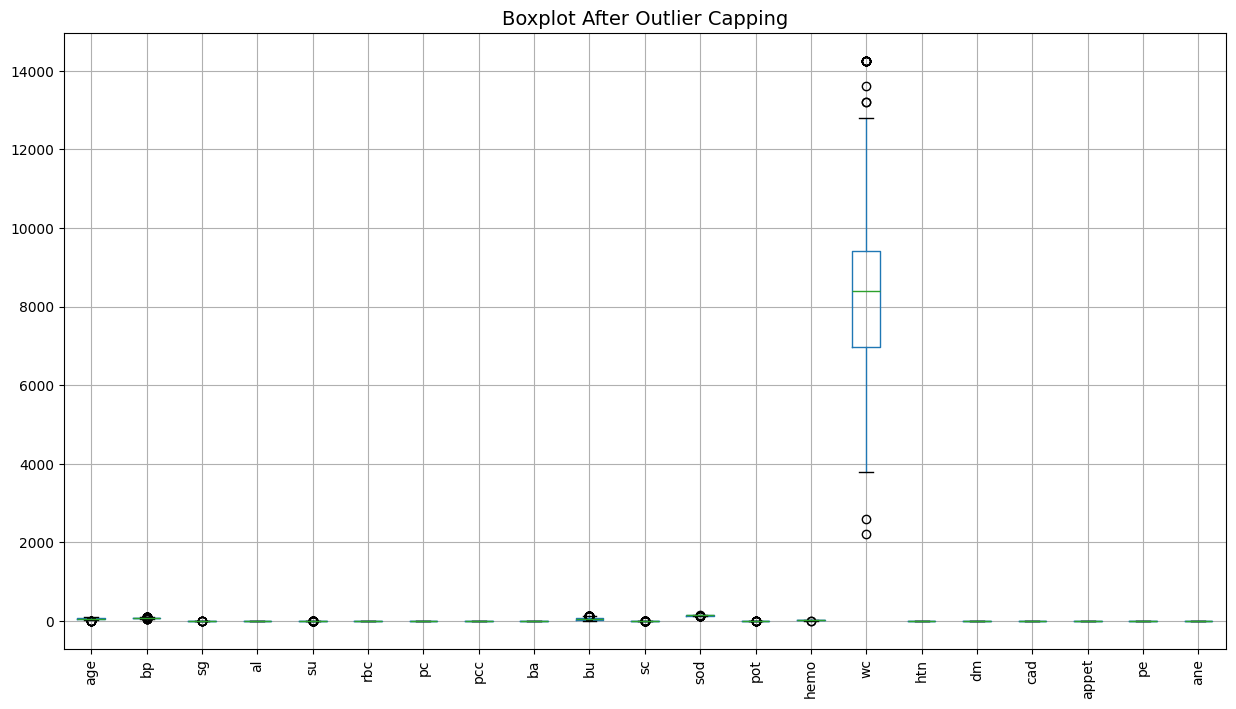

In [31]:
plt.figure(figsize=(15,8))
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
df_capped[num_cols].boxplot(rot=90)
plt.title("Boxplot After Outlier Capping", fontsize=14)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X = df_capped.drop(columns=['classification'])
y = df_capped['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # ✅ fit on train
X_test_scaled  = scaler.transform(X_test) 

In [34]:
print("\nValue counts:\n", y.value_counts())


Value counts:
 classification
1    250
0    150
Name: count, dtype: int64


In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("✅ SMOTE Applied")
print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_smote.value_counts().to_dict())

✅ SMOTE Applied
Before SMOTE: {1: 200, 0: 120}
After SMOTE: {1: 200, 0: 200}


In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_smote, y_train_smote)
y_pred = log_reg.predict(X_test_scaled)

# Step 5: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8875

Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        30
           1       1.00      0.82      0.90        50

    accuracy                           0.89        80
   macro avg       0.88      0.91      0.89        80
weighted avg       0.91      0.89      0.89        80


Confusion Matrix:
 [[30  0]
 [ 9 41]]


In [38]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_smote, y_train_smote)

# Predictions on scaled test data
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Model Trained")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes Model Trained
Accuracy: 0.625

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.62      1.00      0.77        50

    accuracy                           0.62        80
   macro avg       0.31      0.50      0.38        80
weighted avg       0.39      0.62      0.48        80


Confusion Matrix:
 [[ 0 30]
 [ 0 50]]


In [39]:
from sklearn.neighbors import KNeighborsClassifier


# Train KNN model (k=5)
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train_smote, y_train_smote)

# Predictions on scaled test data
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluation
print("✅ KNN Model Trained")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


✅ KNN Model Trained
Accuracy: 0.625

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.62      1.00      0.77        50

    accuracy                           0.62        80
   macro avg       0.31      0.50      0.38        80
weighted avg       0.39      0.62      0.48        80


Confusion Matrix:
 [[ 0 30]
 [ 0 50]]


In [40]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=None)  # max_depth=None = full tree
dt_model.fit(X_train_smote, y_train_smote)

# Predictions (scaled test data for consistency)
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluation
print("✅ Decision Tree Model Trained")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


✅ Decision Tree Model Trained
Accuracy: 0.625

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.62      1.00      0.77        50

    accuracy                           0.62        80
   macro avg       0.31      0.50      0.38        80
weighted avg       0.39      0.62      0.48        80


Confusion Matrix:
 [[ 0 30]
 [ 0 50]]


In [43]:
import pickle

In [49]:
with open("log_model.pkl", "wb") as f:
    pickle.dump(log_reg, f)

In [50]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Logistic Regression model & Scaler saved successfully!")

Logistic Regression model & Scaler saved successfully!


In [51]:
# Load model
with open("log_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Load scaler
with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

# Test prediction
sample = X_test.iloc[0:1]   # ek sample row
scaled_sample = loaded_scaler.transform(sample)
print("Prediction:", loaded_model.predict(scaled_sample))


Prediction: [0]


In [52]:
# Check training dataset columns
print("Columns in training data used for model:")
print(list(X.columns))


Columns in training data used for model:
['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bu', 'sc', 'sod', 'pot', 'hemo', 'wc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [53]:
print("Total features used:", X.shape[1])
print("Feature names:\n", list(X.columns))


Total features used: 21
Feature names:
 ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bu', 'sc', 'sod', 'pot', 'hemo', 'wc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
